In [1]:
import pandas as pd
from extract_bandgaps import get_bandgaps, plot_style

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# for better readability of the plots
import seaborn as sns
sns.set_context('paper', font_scale=1.8)

In [3]:
ref_bandgap = get_bandgaps('./reference/aims.out', direct=False)
ref_bandgap

0.50446359

Read the data obtained from `extract_bandgaps.py` as [pandas.Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) from [csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_csv.html#pandas.DataFrame.from_csv)

In [4]:
df_cl = pd.read_csv('bandgap_data.csv', index_col=0)
# or for quantum:
# df_qm = pd.read_csv('quantum.csv', index_col=0)

[Plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) the [mean values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html#pandas.DataFrame.mean) using [standard deviation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html#pandas.DataFrame.std) as an error bar and use an [annotation](https://matplotlib.org/tutorials/text/annotations.html#annotations)

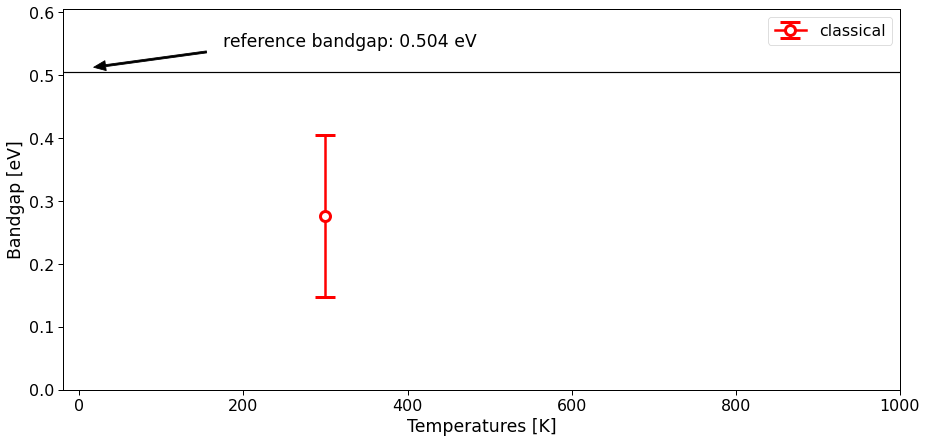

In [5]:
fig, ax = plt.subplots(figsize=(15, 7))

# plot the mean value of bandgaps +/- std. deviation
df_cl.bandgap.plot(ax=ax, yerr=df_cl.err, label='classical', **plot_style, color='red')
# df_qm.bandgap.plot(ax=ax, yerr=df_qm.err, label='quantum', **plot_style)

# add reference bandgap and annotation
# ref_bandgap = ref_direct_bandgap
ax.axhline(ref_bandgap, color='k')
ax.annotate(
    f'reference bandgap: {ref_bandgap:.3f} eV', 
    xy=(0, ref_bandgap * 1.01), 
    xytext=(175, ref_bandgap * 1.1),     
    arrowprops={'facecolor': 'k', 'width': 2, 'headwidth': 10, 'shrink': 0.1},
    verticalalignment='center',
)
               
ax.set_xlim([-20, 1000])
ax.set_ylim([0, 1.2 * ref_bandgap])
ax.set_xlabel('Temperatures [K]')
ax.set_ylabel('Bandgap [eV]')
ax.legend()
plt.show()